In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Clean Orders

In [290]:
df_orders = pd.read_csv("data/Orders.csv")
df_orders.drop_duplicates(inplace=True)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Mode       9994 non-null   object 
 4   Customer ID     9994 non-null   object 
 5   Customer Name   9994 non-null   object 
 6   Origin Channel  9994 non-null   object 
 7   Country/Region  9994 non-null   object 
 8   City            9994 non-null   object 
 9   State           9994 non-null   object 
 10  Postal Code     9983 non-null   float64
 11  Region          9994 non-null   object 
 12  Category        9994 non-null   object 
 13  Sub-Category    9994 non-null   object 
 14  Product ID      9994 non-null   object 
 15  Sales           9994 non-null   float64
 16  Quantity        9994 non-null   int64  
 17  Discount        9994 non-null   f

In [291]:
df_orders.columns = df_orders.columns.str.lower()
df_orders.columns = df_orders.columns.str.replace(' ','_')
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   order_date      9994 non-null   object 
 3   ship_mode       9994 non-null   object 
 4   customer_id     9994 non-null   object 
 5   customer_name   9994 non-null   object 
 6   origin_channel  9994 non-null   object 
 7   country/region  9994 non-null   object 
 8   city            9994 non-null   object 
 9   state           9994 non-null   object 
 10  postal_code     9983 non-null   float64
 11  region          9994 non-null   object 
 12  category        9994 non-null   object 
 13  sub-category    9994 non-null   object 
 14  product_id      9994 non-null   object 
 15  sales           9994 non-null   float64
 16  quantity        9994 non-null   int64  
 17  discount        9994 non-null   f

In [292]:
df_orders.drop(["country/region"], axis=1, inplace=True)
df_orders.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [293]:
df_orders['order_date'] = pd.to_datetime(df_orders.order_date, dayfirst=True)
#pd.to_datetime(dataLake.day, dayfirst=true)

In [294]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_mode       9994 non-null   object        
 4   customer_id     9994 non-null   object        
 5   customer_name   9994 non-null   object        
 6   origin_channel  9994 non-null   object        
 7   city            9994 non-null   object        
 8   state           9994 non-null   object        
 9   postal_code     9983 non-null   float64       
 10  region          9994 non-null   object        
 11  category        9994 non-null   object        
 12  sub-category    9994 non-null   object        
 13  product_id      9994 non-null   object        
 14  sales           9994 non-null   float64       
 15  quan

In [295]:
pd.concat(g for _, g in df_orders.groupby("order_id") if len(g) > 1)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
6507,6289,CA-2017-100090,2017-07-08,Standard Class,EB-13705,Ed Braxton,Sales,San Francisco,California,94122.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001597,196.704,6,0.2,68.8464
8069,6288,CA-2017-100090,2017-07-08,Standard Class,EB-13705,Ed Braxton,Sales,San Francisco,California,94122.0,West,Toasted Muesli,Sweetened,FUR-TA-10003715,502.488,3,0.2,-87.9354
1173,3836,CA-2017-100363,2017-04-08,Standard Class,JM-15655,Jim Mitchum,Sales,Glendale,Arizona,85301.0,West,Power Muesli,Maple Sweetened,OFF-FA-10000611,2.368,2,0.2,0.8288
2644,3837,CA-2017-100363,2017-04-08,Standard Class,JM-15655,Jim Mitchum,Sales,Glendale,Arizona,85301.0,West,Power Muesli,Nuts and more,OFF-PA-10004733,19.008,3,0.2,6.8904
499,6572,CA-2017-100678,2017-04-18,Standard Class,KM-16720,Kunst Miller,Email,Houston,Texas,77095.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000474,227.976,3,0.2,28.4970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,5935,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10003033,527.920,2,0.2,85.7870
2942,5931,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Power Muesli,Nuts and more,OFF-PA-10004100,15.552,3,0.2,5.4432
4023,5932,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Special Projects Muesil,Only Oats,TEC-PH-10001363,683.988,2,0.4,-113.9980
5220,5933,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Power Muesli,Steel Cut,OFF-ST-10004835,13.392,3,0.2,1.0044


In [296]:
df_orders.loc[df_orders['order_id'] == 'CA-2020-101182']

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
2542,3080,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Power Muesli,Nuts and more,OFF-PA-10001800,12.960,2,0.0,6.2208
3772,3081,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Special Projects Muesil,Only Oats,TEC-PH-10003589,43.176,3,0.2,15.1116


In [297]:
def import_and_clean(path,date_colum):
    # load csv file into df
    df = pd.read_csv('data/'+path+'.csv')

    #clean header with lowercase and replace whitespace
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')

    #change date column type into datetime
    df[date_colum] = pd.to_datetime(df[date_colum], dayfirst=True)
    return df
    



## Import and Clean OPD

In [298]:
df_opd = import_and_clean('OrderProcessData','order_date')
df_opd['on_truck_scan_date'] = pd.to_datetime(df_opd['on_truck_scan_date'], dayfirst=True)
df_opd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   int64         
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


In [299]:
df_opd.sort_values(by=['order_id'])

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
2124,4409,CA-2019-100041,2019-11-20,2019-11-27,Standard Processing
2123,4408,CA-2019-100041,2019-11-20,2019-11-27,Standard Processing
2122,4407,CA-2019-100041,2019-11-20,2019-11-27,Standard Processing
2202,1894,CA-2019-100083,2019-11-24,2019-12-04,Standard Processing
2415,456,CA-2019-100153,2019-12-13,2019-12-18,Standard Processing
...,...,...,...,...,...
3796,5931,US-2020-169551,2020-07-07,2020-07-10,Express
3797,5932,US-2020-169551,2020-07-07,2020-07-10,Express
3798,5933,US-2020-169551,2020-07-07,2020-07-10,Express
3799,5934,US-2020-169551,2020-07-07,2020-07-10,Express


In [300]:
df_opd.drop_duplicates(inplace=True)

__PROBLEMFALL__

In [301]:
df_opd.loc[df_opd['order_id'] == 'CA-2020-101182']

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
4216,3080,CA-2020-101182,2020-09-04,2020-09-07,Express
4217,3081,CA-2020-101182,2020-09-04,2020-09-08,Express


In [14]:
#df_opd.drop(["row_id"], axis=1, inplace=True)
df_opd.drop_duplicates(inplace=True)

## Import and Clean IDS

In [302]:
df_ids = import_and_clean('InternDataStudy','pickup_date')

In [303]:
#change date column type into datetime
df_ids = import_and_clean('InternDataStudy','pickup_date')

In [305]:
df_ids['ready_to_ship_day'] = df_ids['ready_to_ship_date'].dt.strftime(('%A'))

AttributeError: Can only use .dt accessor with datetimelike values

In [306]:
df_ids.groupby(['ready_to_ship_day']).count()

KeyError: 'ready_to_ship_day'

In [307]:
df_ids['ready_to_ship_date'] = pd.to_datetime(df_ids['ready_to_ship_date'], dayfirst=True)
df_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


In [308]:
df_ids.sort_values(by=['order_id'])

,order_id,ready_to_ship_date,pickup_date
80,CA-2019-100244,2019-09-24,2019-09-25
83,CA-2019-100244,2019-09-24,2019-09-25
79,CA-2019-100244,2019-09-24,2019-09-25
78,CA-2019-100244,2019-09-24,2019-09-25
82,CA-2019-100244,2019-09-24,2019-09-25
...,...,...,...
107,US-2020-163790,2020-11-04,2020-11-06
184,US-2020-165344,2020-11-16,2020-11-16
283,US-2020-165456,2020-12-03,2020-12-04
103,US-2020-168116,2020-11-04,2020-11-04


In [343]:
df_ids.drop_duplicates(inplace=True)

In [341]:
test100

In [344]:
df_ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   ready_to_ship_date  204 non-null    datetime64[ns]
 2   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.4+ KB


In [311]:
pd.concat(g for _, g in df_ids.groupby("order_id") if len(g) > 1)

ValueError: No objects to concatenate

## Import and Clean CD

In [312]:
df_cd=import_and_clean('Campaign Data', 'arrival_scan_date')
df_cd.drop(["customer_name"], axis=1, inplace=True)


In [313]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.3+ KB


In [314]:
df_cd.sort_values(by=['order_id'])

,order_id,arrival_scan_date
222,CA-2019-100041,2019-12-02
237,CA-2019-100083,2019-12-09
131,CA-2019-100244,2019-09-30
236,CA-2019-100468,2019-12-09
55,CA-2019-100510,2019-05-28
...,...,...
332,US-2020-139647,2020-05-15
283,US-2020-148551,2020-01-22
284,US-2020-158512,2020-01-27
298,US-2020-163195,2020-03-02


In [315]:
#check dupliactes order_id
pd.concat(g for _, g in df_cd.groupby("order_id") if len(g) > 1)

ValueError: No objects to concatenate

In [316]:
df_cd.drop_duplicates(inplace=True)

In [317]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 7.8+ KB


## Merging Big Beautiful Data Tree

In [318]:
#big_beautiful_data_tree = df_orders.merge(df_opd, 
                        #left_on='index',
                        #right_on='row_id',
                        #how ='left',  
                     #) 
#big_beautiful_data_tree

big_beautiful_data_tree = df_orders.merge(df_opd[['row_id','on_truck_scan_date']],
                     left_on='index',
                     right_on='row_id',
                     how ='left',  
                     ) 
big_beautiful_data_tree

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,row_id,on_truck_scan_date
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,27.0,2019-01-23
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,45.0,2019-03-13
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,48.0,2019-06-26
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,60.0,2019-06-19
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209.0,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,9894.0,2019-07-31
9990,9908,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804.0,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,NaN,NaT
9991,9913,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101.0,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,NaN,NaT
9992,9920,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803.0,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310,9920.0,2019-03-20


In [319]:
big_beautiful_data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               9994 non-null   int64         
 1   order_id            9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ship_mode           9994 non-null   object        
 4   customer_id         9994 non-null   object        
 5   customer_name       9994 non-null   object        
 6   origin_channel      9994 non-null   object        
 7   city                9994 non-null   object        
 8   state               9994 non-null   object        
 9   postal_code         9983 non-null   float64       
 10  region              9994 non-null   object        
 11  category            9994 non-null   object        
 12  sub-category        9994 non-null   object        
 13  product_id          9994 non-null   object      

In [320]:
big_beautiful_data_tree.loc[big_beautiful_data_tree['order_id'] == 'CA-2020-101182']

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,row_id,on_truck_scan_date
2542,3080,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Power Muesli,Nuts and more,OFF-PA-10001800,12.960,2,0.0,6.2208,3080.0,2020-09-07
3772,3081,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Special Projects Muesil,Only Oats,TEC-PH-10003589,43.176,3,0.2,15.1116,3081.0,2020-09-08


In [321]:
big_beautiful_data_tree = big_beautiful_data_tree.join(df_ids.set_index('order_id'), on='order_id')

In [425]:
big_beautiful_data_tree.count()

index                 9994
order_id              9994
order_date            9994
ship_mode             9994
customer_id           9994
customer_name         9994
origin_channel        9994
city                  9994
state                 9994
postal_code           9994
region                9994
category              9994
sub-category          9994
product_id            9994
sales                 9994
quantity              9994
discount              9994
profit                9994
row_id                5899
on_truck_scan_date    5899
ready_to_ship_date     418
pickup_date            418
arrival_scan_date      668
dtype: int64

In [426]:
#big_beautiful_data_tree = big_beautiful_data_tree.join(df_cd.set_index('order_id'), on='order_id')
big_beautiful_data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               9994 non-null   int64         
 1   order_id            9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ship_mode           9994 non-null   object        
 4   customer_id         9994 non-null   object        
 5   customer_name       9994 non-null   object        
 6   origin_channel      9994 non-null   object        
 7   city                9994 non-null   object        
 8   state               9994 non-null   object        
 9   postal_code         9994 non-null   float64       
 10  region              9994 non-null   object        
 11  category            9994 non-null   object        
 12  sub-category        9994 non-null   object        
 13  product_id          9994 non-null   object      

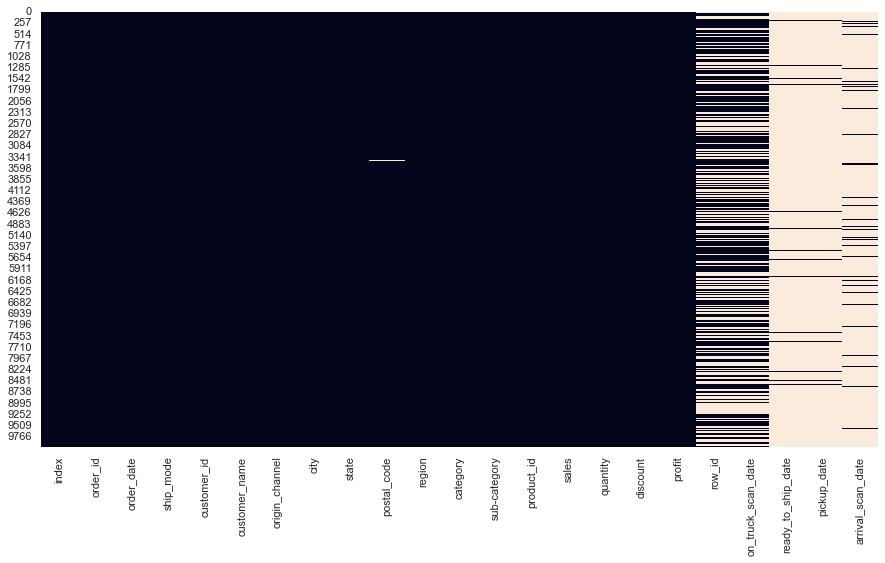

In [324]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(big_beautiful_data_tree.isnull(), cbar=False);

In [325]:
big_beautiful_data_tree['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('Second Class', 'Standard Processing')
big_beautiful_data_tree['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('Standard Class', 'Standard Processing')
big_beautiful_data_tree['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('First Class', 'Express')
big_beautiful_data_tree[['postal_code']] = big_beautiful_data_tree[['postal_code']].fillna(value=0)

In [346]:
big_beautiful_data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               9994 non-null   int64         
 1   order_id            9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ship_mode           9994 non-null   object        
 4   customer_id         9994 non-null   object        
 5   customer_name       9994 non-null   object        
 6   origin_channel      9994 non-null   object        
 7   city                9994 non-null   object        
 8   state               9994 non-null   object        
 9   postal_code         9994 non-null   float64       
 10  region              9994 non-null   object        
 11  category            9994 non-null   object        
 12  sub-category        9994 non-null   object        
 13  product_id          9994 non-null   object      

In [365]:
only_process_time = big_beautiful_data_tree.iloc[: , [1,3,2,20]].copy()
only_process_time.drop_duplicates(inplace=True)
test100 = only_process_time.dropna()
test100['process_time']= (test100["ready_to_ship_date"]-test100["order_date"]).dt.days
test100

/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_34175/2486012658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test100['process_time']= (test100["ready_to_ship_date"]-test100["order_date"]).dt.days


,order_id,ship_mode,order_date,ready_to_ship_date,process_time
8,CA-2020-119004,Standard Processing,2020-11-23,2020-11-30,7
17,CA-2019-145625,Standard Processing,2019-09-11,2019-09-17,6
43,CA-2020-135307,Express,2020-11-26,2020-11-27,1
85,CA-2019-102981,Standard Processing,2019-09-06,2019-09-09,3
102,US-2020-155425,Express,2020-11-10,2020-11-11,1
...,...,...,...,...,...
9431,CA-2020-152142,Standard Processing,2020-11-14,2020-11-16,2
9453,US-2019-134488,Standard Processing,2019-09-24,2019-10-01,7
9661,CA-2020-103499,Standard Processing,2020-11-20,2020-11-24,4
9948,US-2020-165456,Express,2020-11-30,2020-12-03,3


In [368]:
test100.groupby(['ship_mode']).describe()

process_time                                             
                           count      mean       std  min  25%  50%  75%  max
ship_mode                                                                    
Express                     53.0  2.037736  1.686625  0.0  0.0  2.0  3.0  5.0
Standard Processing        151.0  4.927152  1.442680  2.0  4.0  5.0  6.0  8.0

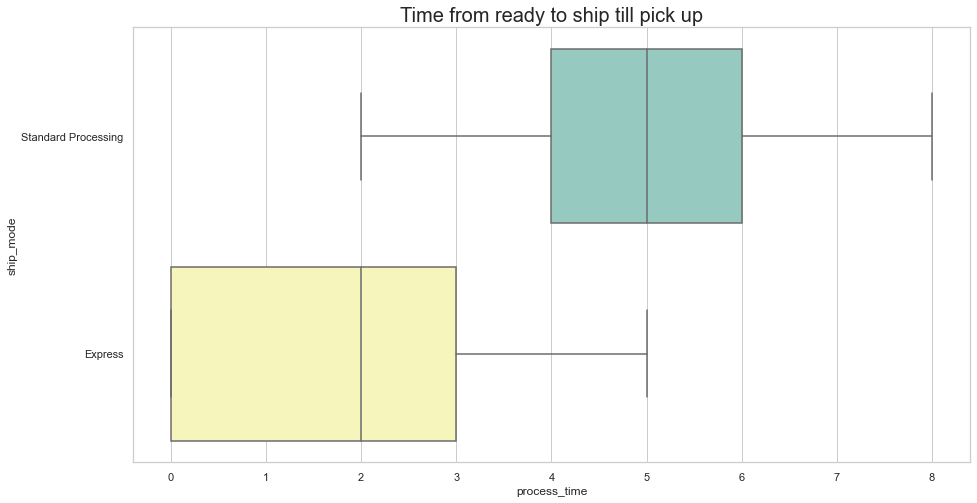

In [366]:
sns.set_theme(style="whitegrid")
sns.boxplot( y=test100["ship_mode"], x=test100["process_time"],palette="Set3" ).set_title('Time from ready to ship till pick up', fontsize = 20);
plt.show()

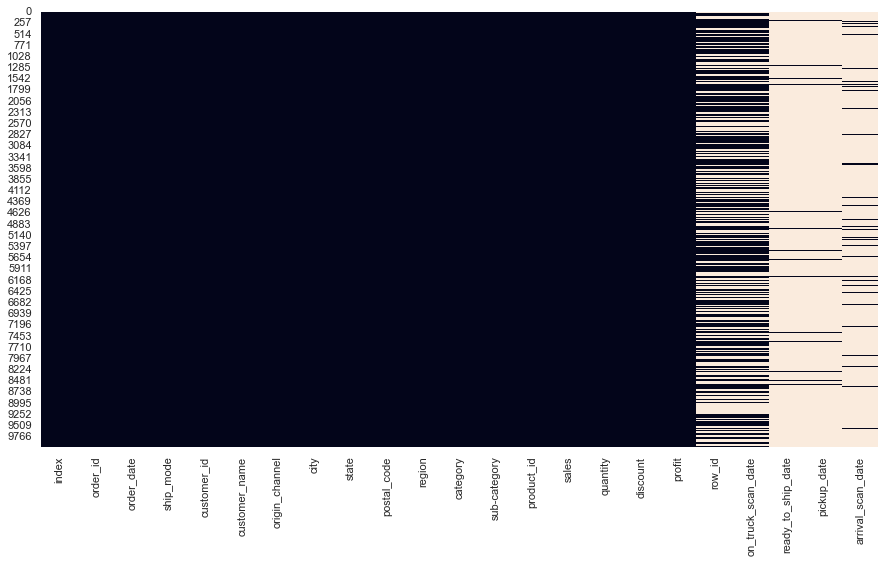

In [327]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(big_beautiful_data_tree.isnull(), cbar=False);

### Full tracked orders

In [328]:
full_tracking_orders = big_beautiful_data_tree.dropna()

In [329]:
full_tracking_orders.loc[full_tracking_orders['ship_mode'] == 'Standard Processing'].describe()

,index,postal_code,sales,quantity,discount,profit,row_id
count,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000
mean,4126.628571,52051.942857,225.18340,3.457143,0.134286,33.622971,4126.628571
std,2873.670732,36500.378220,580.56876,2.616046,0.181404,113.283537,2873.670732
min,99.000000,7050.000000,2.90700,1.000000,0.000000,-157.938300,99.000000
25%,2057.000000,10035.000000,11.97600,2.000000,0.000000,3.117600,2057.000000
50%,3413.000000,43130.000000,60.60000,3.000000,0.000000,8.922000,3413.000000
75%,5744.500000,93079.500000,131.72400,4.500000,0.200000,30.627600,5744.500000
max,9973.000000,98198.000000,3347.37000,13.000000,0.700000,636.000300,9973.000000


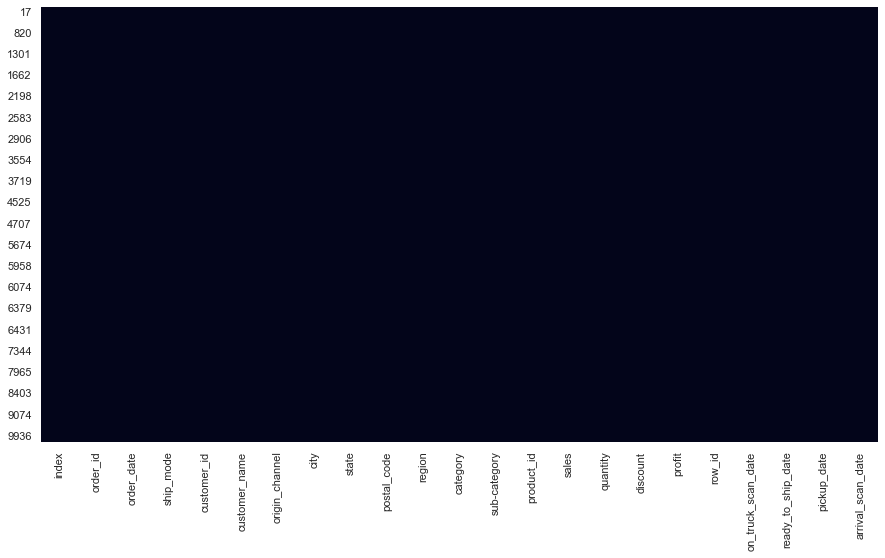

In [330]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(full_tracking_orders.isnull(), cbar=False);

### check if on_truck_scan_date = pickup_date

In [331]:
whats_the_difference =(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["pickup_date"]).dt.days
#whats_the_difference.dropna()
whats_the_difference = whats_the_difference.dropna()
whats_the_difference = whats_the_difference.reset_index(drop=True)
whats_the_difference.describe()



count    418.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [44]:
big_beautiful_data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               9994 non-null   int64         
 1   order_id            9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ship_mode           9994 non-null   object        
 4   customer_id         9994 non-null   object        
 5   customer_name       9994 non-null   object        
 6   origin_channel      9994 non-null   object        
 7   city                9994 non-null   object        
 8   state               9994 non-null   object        
 9   postal_code         9994 non-null   float64       
 10  region              9994 non-null   object        
 11  category            9994 non-null   object        
 12  sub-category        9994 non-null   object        
 13  product_id          9994 non-null   object      

In [332]:
dates_tracking = big_beautiful_data_tree.iloc[: , [1,3,2,20,19,21,22]].copy()

In [333]:
dates_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            9994 non-null   object        
 1   ship_mode           9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ready_to_ship_date  418 non-null    datetime64[ns]
 4   on_truck_scan_date  5899 non-null   datetime64[ns]
 5   pickup_date         418 non-null    datetime64[ns]
 6   arrival_scan_date   668 non-null    datetime64[ns]
dtypes: datetime64[ns](5), object(2)
memory usage: 624.6+ KB


In [334]:
dates_tracking['order_day'] = dates_tracking['order_date'].dt.strftime(('%A'))
dates_tracking['ship_day'] = dates_tracking['ready_to_ship_date'].dt.strftime(('%A'))
dates_tracking['on_truck_day'] = dates_tracking['on_truck_scan_date'].dt.strftime(('%A'))
dates_tracking['pickup_day'] = dates_tracking['pickup_date'].dt.strftime(('%A'))
dates_tracking['arrival_day'] = dates_tracking['arrival_scan_date'].dt.strftime(('%A'))
dates_tracking['process_time'] = dates_tracking['ready_to_ship_date']-dates_tracking['order_date']



In [288]:
dates_tracking.to_csv('/Users/christian/Documents/Geadaddel/dates_tracking.csv')

In [335]:
monday_order = dates_tracking[dates_tracking.order_day == 'Monday']
tuesday_order = dates_tracking[dates_tracking.order_day == 'Tuesday']
wednesday_order = dates_tracking[dates_tracking.order_day == 'Wednesday']
thursday_order = dates_tracking[dates_tracking.order_day == 'Thursday']
friday_order = dates_tracking[dates_tracking.order_day == 'Friday']
saturday_order = dates_tracking[dates_tracking.order_day == 'Saturday']
sunday_order = dates_tracking[dates_tracking.order_day == 'Sunday']

In [336]:
monday_order
#monday_order.groupby(['order_day','ship_mode'])['fullprocess_time'].mean().round().astype(int)
#monday_order.groupby(['order_day','ship_mode']).count()

,order_id,ship_mode,order_date,ready_to_ship_date,on_truck_scan_date,pickup_date,arrival_scan_date,order_day,ship_day,on_truck_day,pickup_day,arrival_day,process_time
1,CA-2019-118255,Express,2019-03-11,NaT,2019-03-13,NaT,NaT,Monday,NaN,Wednesday,NaN,NaN,NaT
3,CA-2019-111682,Express,2019-06-17,NaT,2019-06-19,NaT,NaT,Monday,NaN,Wednesday,NaN,NaN,NaT
5,CA-2020-155558,Standard Processing,2020-10-26,NaT,2020-11-04,NaT,NaT,Monday,NaN,Wednesday,NaN,NaN,NaT
8,CA-2020-119004,Standard Processing,2020-11-23,2020-11-30,2020-12-02,2020-12-02,NaT,Monday,Monday,Wednesday,Wednesday,NaN,7 days
9,CA-2018-129476,Standard Processing,2018-10-15,NaT,NaT,NaT,NaT,Monday,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,CA-2019-159009,Standard Processing,2019-09-23,NaT,2019-09-30,NaT,NaT,Monday,NaN,Monday,NaN,NaN,NaT
9970,CA-2020-152975,Express,2020-09-14,NaT,2020-09-16,NaT,NaT,Monday,NaN,Wednesday,NaN,NaN,NaT
9975,CA-2019-161746,Standard Processing,2019-10-21,NaT,2019-10-30,NaT,NaT,Monday,NaN,Wednesday,NaN,NaN,NaT
9984,CA-2020-107209,Standard Processing,2020-07-27,NaT,2020-08-05,NaT,NaT,Monday,NaN,Wednesday,NaN,NaN,NaT


In [337]:
dates_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            9994 non-null   object         
 1   ship_mode           9994 non-null   object         
 2   order_date          9994 non-null   datetime64[ns] 
 3   ready_to_ship_date  418 non-null    datetime64[ns] 
 4   on_truck_scan_date  5899 non-null   datetime64[ns] 
 5   pickup_date         418 non-null    datetime64[ns] 
 6   arrival_scan_date   668 non-null    datetime64[ns] 
 7   order_day           9994 non-null   object         
 8   ship_day            418 non-null    object         
 9   on_truck_day        5899 non-null   object         
 10  pickup_day          418 non-null    object         
 11  arrival_day         668 non-null    object         
 12  process_time        418 non-null    timedelta64[ns]
dtypes: datetime64[ns](5), object(7), 

In [380]:
check_workflow_on_days = dates_tracking.iloc[: , [1,2,3,6]].copy()

In [381]:
check_workflow_on_days['process_time'] = (big_beautiful_data_tree["ready_to_ship_date"]-big_beautiful_data_tree["order_date"]).dt.days
check_workflow_on_days['fullprocess_time'] = (big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days


In [382]:
check_workflow_on_days['order_day'] = check_workflow_on_days['order_date'].dt.strftime(('%A'))
check_workflow_on_days['ready_to_ship_day'] = check_workflow_on_days['ready_to_ship_date'].dt.strftime(('%A'))
check_workflow_on_days['arrival_day'] = check_workflow_on_days['arrival_scan_date'].dt.strftime(('%A'))


In [423]:
sunday_express = check_workflow_on_days[check_workflow_on_days.order_day == 'Sunday']
#test200=sunday_express.dropna()
#test200.info()

check_workflow_on_days.loc[check_workflow_on_days['process_time'] >=2]


,ship_mode,order_date,ready_to_ship_date,arrival_scan_date,process_time,fullprocess_time,order_day,ready_to_ship_day,arrival_day
8,Standard Processing,2020-11-23,2020-11-30,NaT,7.0,NaN,Monday,Monday,NaN
17,Standard Processing,2019-09-11,2019-09-17,2019-09-23,6.0,12.0,Wednesday,Tuesday,Monday
85,Standard Processing,2019-09-06,2019-09-09,2019-09-16,3.0,10.0,Friday,Monday,Monday
123,Express,2020-11-18,2020-11-23,NaT,5.0,NaN,Wednesday,Monday,NaN
163,Standard Processing,2020-11-07,2020-11-09,NaT,2.0,NaN,Saturday,Monday,NaN
...,...,...,...,...,...,...,...,...,...
9929,Standard Processing,2020-11-25,2020-11-30,NaT,5.0,NaN,Wednesday,Monday,NaN
9936,Standard Processing,2019-09-02,2019-09-05,2019-09-10,3.0,8.0,Monday,Thursday,Tuesday
9948,Express,2020-11-30,2020-12-03,NaT,3.0,NaN,Monday,Thursday,NaN
9963,Standard Processing,2020-11-25,2020-11-30,NaT,5.0,NaN,Wednesday,Monday,NaN


In [384]:
check_workflow_on_days

,ship_mode,order_date,ready_to_ship_date,arrival_scan_date,process_time,fullprocess_time,order_day,ready_to_ship_day,arrival_day
0,Standard Processing,2019-01-16,NaT,NaT,NaN,NaN,Wednesday,NaN,NaN
1,Express,2019-03-11,NaT,NaT,NaN,NaN,Monday,NaN,NaN
2,Standard Processing,2019-06-20,NaT,NaT,NaN,NaN,Thursday,NaN,NaN
3,Express,2019-06-17,NaT,NaT,NaN,NaN,Monday,NaN,NaN
4,Standard Processing,2018-11-24,NaT,NaT,NaN,NaN,Saturday,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,Standard Processing,2019-07-25,NaT,NaT,NaN,NaN,Thursday,NaN,NaN
9990,Express,2018-09-13,NaT,NaT,NaN,NaN,Thursday,NaN,NaN
9991,Express,2018-10-10,NaT,NaT,NaN,NaN,Wednesday,NaN,NaN
9992,Standard Processing,2019-03-15,NaT,NaT,NaN,NaN,Friday,NaN,NaN


In [371]:
#heck_workflow_on_days_clean = check_workflow_on_days.dropna()

check_workflow_on_days.groupby(['ready_to_ship_day']).mean()

,fullprocess_time,process_time
ready_to_ship_day,,
Friday,8.000000,4.013699
Monday,11.941176,4.730337
Thursday,8.000000,2.833333
Tuesday,10.600000,4.706897
Wednesday,8.250000,3.218182


In [411]:
#check_workflow_on_days.groupby(['order_day','ship_mode'])['fullprocess_time'].mean().round().astype(int)
test300 = check_workflow_on_days.groupby(['order_day','ship_mode'])['fullprocess_time'].agg(['count','mean']).round().astype(int)


In [412]:
test300

count  mean
order_day ship_mode                       
Friday    Express                 18     9
          Standard Processing     67    11
Monday    Express                 18     7
          Standard Processing     71    13
Saturday  Express                  4     7
          Standard Processing      7     8
Sunday    Express                 31     7
          Standard Processing     99    12
Thursday  Express                 31     7
          Standard Processing     87    11
Tuesday   Express                 26     7
          Standard Processing    103    12
Wednesday Express                 20     8
          Standard Processing     86    12

In [414]:
test400 = check_workflow_on_days.groupby(['order_day','ship_mode'])['process_time'].agg(['count','mean']).round().astype
test400

<bound method NDFrame.astype of                                count  mean
order_day ship_mode                       
Friday    Express                 15   2.0
          Standard Processing     59   5.0
Monday    Express                 15   2.0
          Standard Processing     64   4.0
Saturday  Express                  5   4.0
          Standard Processing     24   5.0
Sunday    Express                  0   NaN
          Standard Processing      5   6.0
Thursday  Express                 20   2.0
          Standard Processing     48   5.0
Tuesday   Express                 20   1.0
          Standard Processing     60   6.0
Wednesday Express                 27   2.0
          Standard Processing     56   5.0>

In [373]:
check_workflow_on_days.groupby(['order_day','ship_mode'])['process_time'].mean().round()

order_day  ship_mode          
Friday     Express                2.0
           Standard Processing    5.0
Monday     Express                2.0
           Standard Processing    4.0
Saturday   Express                4.0
           Standard Processing    5.0
Sunday     Express                NaN
           Standard Processing    6.0
Thursday   Express                2.0
           Standard Processing    5.0
Tuesday    Express                1.0
           Standard Processing    6.0
Wednesday  Express                2.0
           Standard Processing    5.0
Name: process_time, dtype: float64

In [168]:
grouped_workflow_on_days

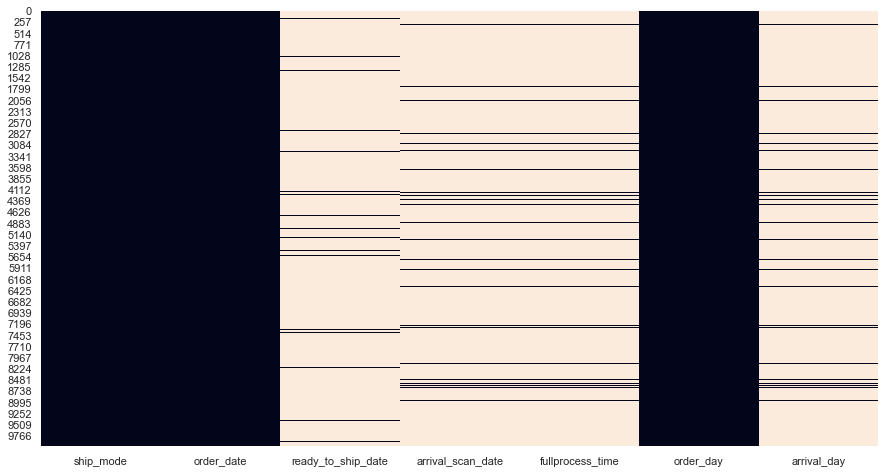

In [166]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(check_workflow_on_days.isnull(), cbar=False);

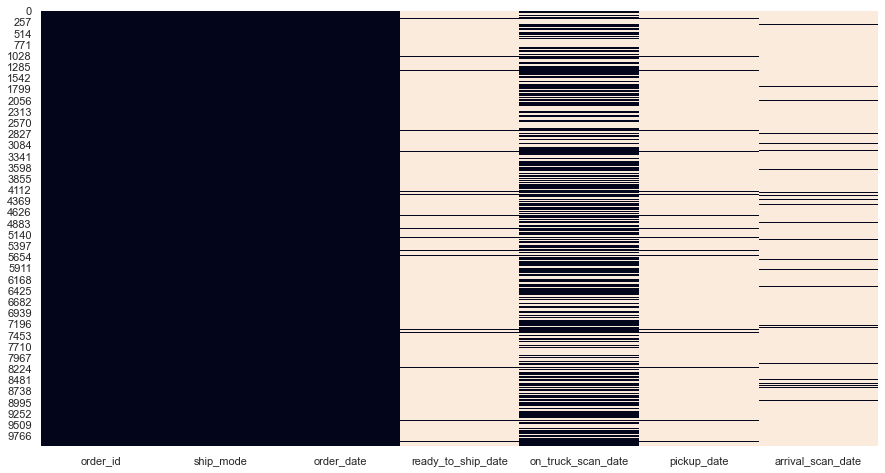

In [126]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(dates_tracking.isnull(), cbar=False);

In [141]:
dates_tracking.info()
drops=dates_tracking.dropna()
drops

,order_id,ship_mode,order_date,ready_to_ship_date,on_truck_scan_date,pickup_date,arrival_scan_date,order_day,ship_day,on_truck_day,pickup_day,arrival_day
17,CA-2019-145625,Standard Processing,2019-09-11,2019-09-17,2019-09-18,2019-09-18,2019-09-23,Wednesday,Tuesday,Wednesday,Wednesday,Monday
85,CA-2019-102981,Standard Processing,2019-09-06,2019-09-09,2019-09-11,2019-09-11,2019-09-16,Friday,Monday,Wednesday,Wednesday,Monday
820,CA-2019-102932,Standard Processing,2019-09-19,2019-09-23,2019-09-25,2019-09-25,2019-09-30,Thursday,Monday,Wednesday,Wednesday,Monday
871,CA-2019-123120,Standard Processing,2019-09-04,2019-09-09,2019-09-11,2019-09-11,2019-09-16,Wednesday,Monday,Wednesday,Wednesday,Monday
1301,CA-2019-149223,Standard Processing,2019-09-06,2019-09-11,2019-09-13,2019-09-13,2019-09-17,Friday,Wednesday,Friday,Friday,Tuesday
1555,CA-2019-149783,Standard Processing,2019-09-04,2019-09-09,2019-09-11,2019-09-11,2019-09-16,Wednesday,Monday,Wednesday,Wednesday,Monday
1662,CA-2019-145611,Standard Processing,2019-09-20,2019-09-24,2019-09-25,2019-09-25,2019-09-30,Friday,Tuesday,Wednesday,Wednesday,Monday
2157,CA-2019-145625,Standard Processing,2019-09-11,2019-09-17,2019-09-18,2019-09-18,2019-09-23,Wednesday,Tuesday,Wednesday,Wednesday,Monday
2198,CA-2019-121223,Standard Processing,2019-09-11,2019-09-13,2019-09-16,2019-09-16,2019-09-19,Wednesday,Friday,Monday,Monday,Thursday
2332,US-2019-118780,Standard Processing,2019-09-10,2019-09-16,2019-09-18,2019-09-18,2019-09-23,Tuesday,Monday,Wednesday,Wednesday,Monday


In [286]:
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9994 non-null   int64  
 1   order_id          9994 non-null   object 
 2   ship_mode         9994 non-null   object 
 3   process_time      418 non-null    float64
 4   pick_up_time      418 non-null    float64
 5   when_on_truck     5899 non-null   float64
 6   warehouse_time    418 non-null    float64
 7   order2truck_time  5899 non-null   float64
 8   delivery_time     668 non-null    float64
 9   fullprocess       668 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 858.9+ KB


In [45]:
process_tracking = big_beautiful_data_tree.iloc[: , [0,1,3]].copy()

### Process Time ready_to_ship - order_date

In [46]:
process_tracking['process_time']=(big_beautiful_data_tree["ready_to_ship_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         9994 non-null   int64  
 1   order_id      9994 non-null   object 
 2   ship_mode     9994 non-null   object 
 3   process_time  418 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 390.4+ KB


### Pick Up Time pick_up_time - order_date

In [47]:
process_tracking['pick_up_time']=(big_beautiful_data_tree["pickup_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         9994 non-null   int64  
 1   order_id      9994 non-null   object 
 2   ship_mode     9994 non-null   object 
 3   process_time  418 non-null    float64
 4   pick_up_time  418 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.5+ KB


### Probe on_truck_scan = pickup_time

### On_Truck_Time_order = on_truck_scan_date - order_date

In [48]:
whats_the_difference =(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["pickup_date"]).dt.days
#whats_the_difference.dropna()
whats_the_difference = whats_the_difference.dropna()
whats_the_difference = whats_the_difference.reset_index(drop=True)
whats_the_difference.describe()

count    418.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [49]:
process_tracking['when_on_truck']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   ship_mode      9994 non-null   object 
 3   process_time   418 non-null    float64
 4   pick_up_time   418 non-null    float64
 5   when_on_truck  5899 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 546.5+ KB


### Time Order is laying around in Warehouse after packaging

In [50]:
process_tracking['warehouse_time']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["ready_to_ship_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   ship_mode       9994 non-null   object 
 3   process_time    418 non-null    float64
 4   pick_up_time    418 non-null    float64
 5   when_on_truck   5899 non-null   float64
 6   warehouse_time  418 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 624.6+ KB


In [275]:
process_tracking['warehouse_time'].tail(200)

9794   NaN
9795   NaN
9796   NaN
9797   NaN
9798   NaN
        ..
9989   NaN
9990   NaN
9991   NaN
9992   NaN
9993   NaN
Name: warehouse_time, Length: 200, dtype: float64

### Time from order to on_truck_scan_date

In [172]:
process_tracking['order2truck_time']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,9994.000000,418.000000,418.000000,5899.000000,418.000000,5899.000000,668.000000,668.000000
mean,4997.500000,4.157895,5.801435,6.120529,1.643541,6.120529,4.561377,10.886228
std,2885.163629,1.949961,2.546695,2.509031,0.966945,2.509031,1.208716,2.878174
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,2499.250000,3.000000,4.000000,5.000000,1.000000,5.000000,4.000000,9.000000
50%,4997.500000,5.000000,7.000000,7.000000,2.000000,7.000000,5.000000,12.000000
75%,7495.750000,6.000000,8.000000,8.000000,2.000000,8.000000,5.000000,13.000000
max,9994.000000,8.000000,10.000000,12.000000,3.000000,12.000000,7.000000,17.000000


In [52]:
### Delivery Time

In [53]:
process_tracking['delivery_time']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["on_truck_scan_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9994 non-null   int64  
 1   order_id          9994 non-null   object 
 2   ship_mode         9994 non-null   object 
 3   process_time      418 non-null    float64
 4   pick_up_time      418 non-null    float64
 5   when_on_truck     5899 non-null   float64
 6   warehouse_time    418 non-null    float64
 7   order2truck_time  5899 non-null   float64
 8   delivery_time     668 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 780.8+ KB


In [54]:
process_tracking['fullprocess']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9994 non-null   int64  
 1   order_id          9994 non-null   object 
 2   ship_mode         9994 non-null   object 
 3   process_time      418 non-null    float64
 4   pick_up_time      418 non-null    float64
 5   when_on_truck     5899 non-null   float64
 6   warehouse_time    418 non-null    float64
 7   order2truck_time  5899 non-null   float64
 8   delivery_time     668 non-null    float64
 9   fullprocess       668 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 858.9+ KB


In [55]:
#process_tracking.drop('arrival_time', axis=1, inplace=True)
process_tracking['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('First Class', 'Express')

In [56]:
process_tracking

,index,order_id,ship_mode,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
0,27,CA-2019-121755,Standard Processing,NaN,NaN,7.0,NaN,7.0,NaN,NaN
1,45,CA-2019-118255,Express,NaN,NaN,2.0,NaN,2.0,NaN,NaN
2,48,CA-2019-169194,Standard Processing,NaN,NaN,6.0,NaN,6.0,NaN,NaN
3,60,CA-2019-111682,Express,NaN,NaN,2.0,NaN,2.0,NaN,NaN
4,63,CA-2018-135545,Standard Processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,Standard Processing,NaN,NaN,6.0,NaN,6.0,NaN,NaN
9990,9908,US-2018-129007,Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9991,9913,CA-2018-132388,Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9992,9920,CA-2019-149272,Standard Processing,NaN,NaN,5.0,NaN,5.0,NaN,NaN


In [57]:
process_tracking.loc[process_tracking['ship_mode'] == 'Standard Processing'].describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,7913.000000,316.000000,316.000000,4596.000000,316.000000,4596.000000,520.000000,520.000000
mean,5012.192847,4.882911,6.930380,7.127502,2.047468,7.127502,4.553846,11.936538
std,2876.558460,1.385489,1.557846,1.651674,0.695308,1.651674,1.146741,2.031024
min,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,6.000000
25%,2548.000000,4.000000,6.000000,6.000000,2.000000,6.000000,4.000000,11.000000
50%,5007.000000,5.000000,7.000000,7.000000,2.000000,7.000000,5.000000,12.000000
75%,7483.000000,6.000000,8.000000,8.000000,3.000000,8.000000,5.000000,13.000000
max,9994.000000,8.000000,10.000000,12.000000,3.000000,12.000000,7.000000,17.000000


In [58]:
process_time_standard=process_tracking.loc[process_tracking['ship_mode'] == 'Standard Processing']

In [59]:
process_time_standard=process_time_standard.dropna()

In [60]:
process_time_standard.describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4126.628571,4.571429,6.285714,6.285714,1.714286,6.285714,4.628571,10.914286
std,2873.670732,1.170362,1.250210,1.250210,0.572478,1.250210,0.731063,1.541035
min,99.000000,2.000000,4.000000,4.000000,1.000000,4.000000,3.000000,8.000000
25%,2057.000000,4.000000,5.000000,5.000000,1.000000,5.000000,5.000000,10.000000
50%,3413.000000,5.000000,7.000000,7.000000,2.000000,7.000000,5.000000,11.000000
75%,5744.500000,5.500000,7.000000,7.000000,2.000000,7.000000,5.000000,12.000000
max,9973.000000,6.000000,8.000000,8.000000,3.000000,8.000000,5.000000,13.000000


In [61]:
process_time_express=process_tracking.loc[process_tracking['ship_mode'] == 'Express']

In [62]:
process_time_express=process_time_express.dropna()

In [63]:
process_time_express.describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4921.500000,1.333333,1.666667,1.666667,0.333333,1.666667,5.166667,6.833333
std,4527.351135,1.032796,1.366260,1.366260,0.516398,1.366260,0.408248,1.471960
min,870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,901.250000,0.500000,0.500000,0.500000,0.000000,0.500000,5.000000,5.500000
50%,3964.500000,2.000000,2.000000,2.000000,0.000000,2.000000,5.000000,7.500000
75%,9181.000000,2.000000,2.750000,2.750000,0.750000,2.750000,5.000000,8.000000
max,9930.000000,2.000000,3.000000,3.000000,1.000000,3.000000,6.000000,8.000000


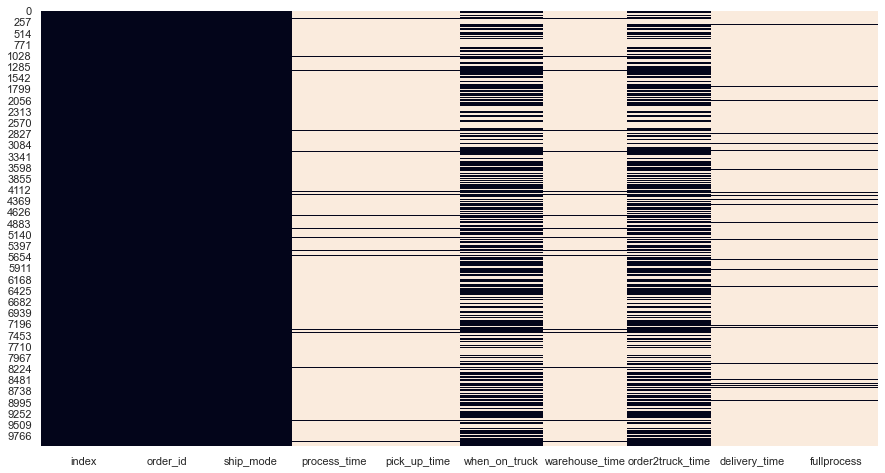

In [74]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(process_tracking.isnull(), cbar=False);

In [284]:
process_tracking.describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,9994.000000,418.000000,418.000000,5899.000000,418.000000,5899.000000,668.000000,668.000000
mean,4997.500000,4.157895,5.801435,6.120529,1.643541,6.120529,4.561377,10.886228
std,2885.163629,1.949961,2.546695,2.509031,0.966945,2.509031,1.208716,2.878174
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,2499.250000,3.000000,4.000000,5.000000,1.000000,5.000000,4.000000,9.000000
50%,4997.500000,5.000000,7.000000,7.000000,2.000000,7.000000,5.000000,12.000000
75%,7495.750000,6.000000,8.000000,8.000000,2.000000,8.000000,5.000000,13.000000
max,9994.000000,8.000000,10.000000,12.000000,3.000000,12.000000,7.000000,17.000000


### Full Tracking

In [65]:
process_time_cleaned=process_tracking.dropna()

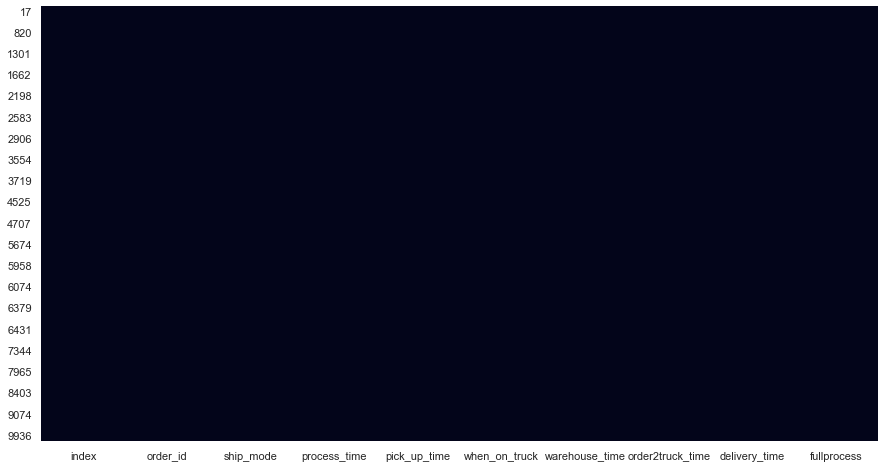

In [66]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(process_time_cleaned.isnull(), cbar=False);

In [67]:
process_time_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 17 to 9936
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             41 non-null     int64  
 1   order_id          41 non-null     object 
 2   ship_mode         41 non-null     object 
 3   process_time      41 non-null     float64
 4   pick_up_time      41 non-null     float64
 5   when_on_truck     41 non-null     float64
 6   warehouse_time    41 non-null     float64
 7   order2truck_time  41 non-null     float64
 8   delivery_time     41 non-null     float64
 9   fullprocess       41 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.5+ KB


In [68]:
process_time_cleaned.drop(["order_id"], axis=1, inplace=True)

/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_34175/2168173427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_time_cleaned.drop(["order_id"], axis=1, inplace=True)


In [69]:
process_time_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 17 to 9936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             41 non-null     int64  
 1   ship_mode         41 non-null     object 
 2   process_time      41 non-null     float64
 3   pick_up_time      41 non-null     float64
 4   when_on_truck     41 non-null     float64
 5   warehouse_time    41 non-null     float64
 6   order2truck_time  41 non-null     float64
 7   delivery_time     41 non-null     float64
 8   fullprocess       41 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.2+ KB


In [70]:
process_time_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 17 to 9936
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             41 non-null     int64  
 1   ship_mode         41 non-null     object 
 2   process_time      41 non-null     float64
 3   pick_up_time      41 non-null     float64
 4   when_on_truck     41 non-null     float64
 5   warehouse_time    41 non-null     float64
 6   order2truck_time  41 non-null     float64
 7   delivery_time     41 non-null     float64
 8   fullprocess       41 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.2+ KB


In [71]:
process_time_cleaned['process_time'] = process_time_cleaned['process_time'].astype(int)
process_time_cleaned['pick_up_time'] = process_time_cleaned['pick_up_time'].astype(int)
process_time_cleaned['when_on_truck'] = process_time_cleaned['when_on_truck'].astype(int)
process_time_cleaned['warehouse_time'] = process_time_cleaned['warehouse_time'].astype(int)
process_time_cleaned['delivery_time'] = process_time_cleaned['delivery_time'].astype(int)
process_time_cleaned['fullprocess'] = process_time_cleaned['fullprocess'].astype(int)


/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_34175/111356970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_time_cleaned['process_time'] = process_time_cleaned['process_time'].astype(int)
/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_34175/111356970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_time_cleaned['pick_up_time'] = process_time_cleaned['pick_up_time'].astype(int)
/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_34175/111356970.py:3: S

In [72]:
process_time_cleaned

,index,ship_mode,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
17,252,Standard Processing,6,7,7,1,7.0,5,12
85,1042,Standard Processing,3,5,5,2,5.0,5,10
820,2882,Standard Processing,4,6,6,2,6.0,5,11
871,5333,Standard Processing,5,7,7,2,7.0,5,12
1301,99,Standard Processing,5,7,7,2,7.0,4,11
1555,5808,Standard Processing,5,7,7,2,7.0,5,12
1662,8046,Standard Processing,4,5,5,1,5.0,5,10
2157,251,Standard Processing,6,7,7,1,7.0,5,12
2198,613,Standard Processing,2,5,5,3,5.0,3,8
2332,1620,Standard Processing,6,8,8,2,8.0,5,13


In [271]:
#process_tracking['process_time']=(big_beautiful_data_tree["ready_to_ship_date"]-big_beautiful_data_tree["order_date"]).dt.days
sns.set_theme(style="whitegrid")
sns.boxplot( y=process_time["ship_mode"], x=process_time["process_time"],palette="Set3" ).set_title('Time from order to ready to ship', fontsize = 20);
plt.show()

NameError: name 'process_time' is not defined

In [267]:
process_tracking.describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,9994.000000,418.000000,418.000000,5899.000000,418.000000,5899.000000,668.000000,668.000000
mean,4997.500000,4.157895,5.801435,6.120529,1.643541,6.120529,4.561377,10.886228
std,2885.163629,1.949961,2.546695,2.509031,0.966945,2.509031,1.208716,2.878174
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,2499.250000,3.000000,4.000000,5.000000,1.000000,5.000000,4.000000,9.000000
50%,4997.500000,5.000000,7.000000,7.000000,2.000000,7.000000,5.000000,12.000000
75%,7495.750000,6.000000,8.000000,8.000000,2.000000,8.000000,5.000000,13.000000
max,9994.000000,8.000000,10.000000,12.000000,3.000000,12.000000,7.000000,17.000000


In [265]:
#process_tracking.describe()
process_tracking.loc[process_tracking['ship_mode'] == 'Express'].describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,2081.000000,102.000000,102.000000,1303.000000,102.000000,1303.000000,148.000000,148.000000
mean,4941.630466,1.911765,2.303922,2.568688,0.392157,2.568688,4.587838,7.195946
std,2917.674406,1.724046,1.693255,1.638534,0.510423,1.638534,1.409053,2.326010
min,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
25%,2290.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,5.000000
50%,4971.000000,2.000000,2.000000,3.000000,0.000000,3.000000,5.000000,7.000000
75%,7564.000000,3.000000,4.000000,4.000000,1.000000,4.000000,5.000000,9.000000
max,9982.000000,5.000000,6.000000,6.000000,2.000000,6.000000,7.000000,13.000000


In [263]:
#process_tracking.describe()
process_tracking_express = process_tracking.loc[process_tracking['ship_mode'] == 'Express']

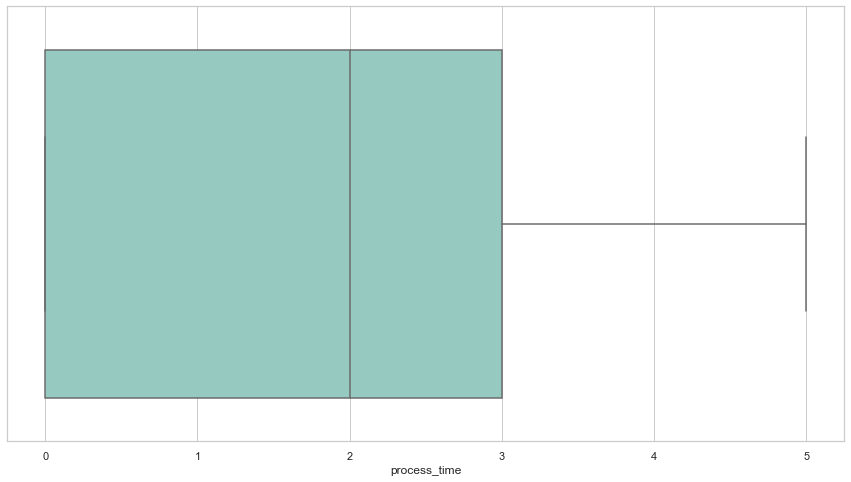

In [266]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=process_tracking_express["process_time"],palette="Set3")
plt.show()

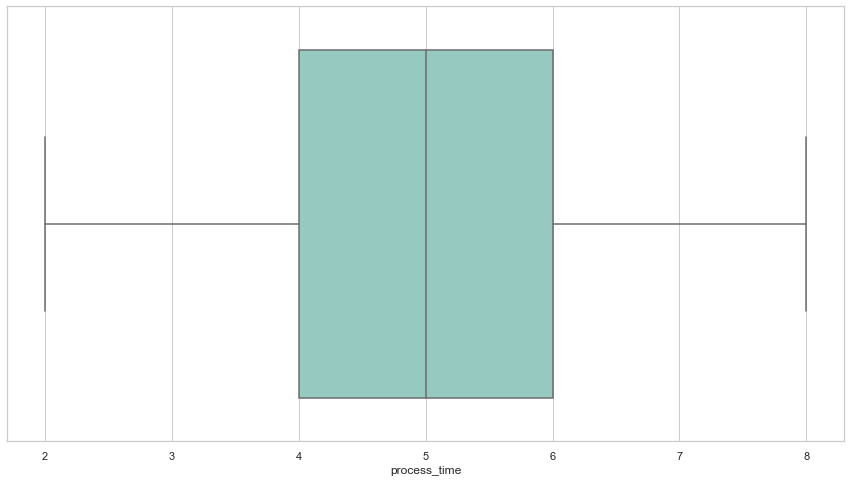

In [270]:
process_tracking_standard = process_tracking.loc[process_tracking['ship_mode'] == 'Standard Processing']
ax = sns.boxplot(x=process_tracking_standard["process_time"],palette="Set3")
plt.show()

In [278]:
process_tracking.loc[process_tracking['ship_mode'] == 'Standard Processing'].describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,7913.000000,316.000000,316.000000,4596.000000,316.000000,4596.000000,520.000000,520.000000
mean,5012.192847,4.882911,6.930380,7.127502,2.047468,7.127502,4.553846,11.936538
std,2876.558460,1.385489,1.557846,1.651674,0.695308,1.651674,1.146741,2.031024
min,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,6.000000
25%,2548.000000,4.000000,6.000000,6.000000,2.000000,6.000000,4.000000,11.000000
50%,5007.000000,5.000000,7.000000,7.000000,2.000000,7.000000,5.000000,12.000000
75%,7483.000000,6.000000,8.000000,8.000000,3.000000,8.000000,5.000000,13.000000
max,9994.000000,8.000000,10.000000,12.000000,3.000000,12.000000,7.000000,17.000000


In [93]:
process_time_cleaned.loc[process_time['ship_mode'] == 'Express'].describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4921.500000,1.333333,1.666667,1.666667,0.333333,1.666667,5.166667,6.833333
std,4527.351135,1.032796,1.366260,1.366260,0.516398,1.366260,0.408248,1.471960
min,870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,901.250000,0.500000,0.500000,0.500000,0.000000,0.500000,5.000000,5.500000
50%,3964.500000,2.000000,2.000000,2.000000,0.000000,2.000000,5.000000,7.500000
75%,9181.000000,2.000000,2.750000,2.750000,0.750000,2.750000,5.000000,8.000000
max,9930.000000,2.000000,3.000000,3.000000,1.000000,3.000000,6.000000,8.000000


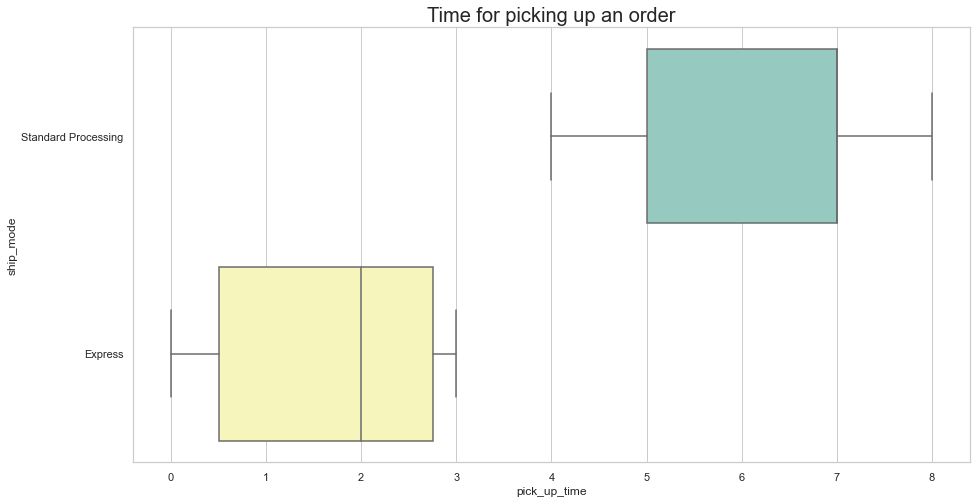

In [86]:
#process_tracking['pick_up_time']=(big_beautiful_data_tree["pickup_date"]-big_beautiful_data_tree["order_date"]).dt.days
sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["pick_up_time"],palette="Set3" ).set_title('Time for picking up an order', fontsize = 20);

plt.show()

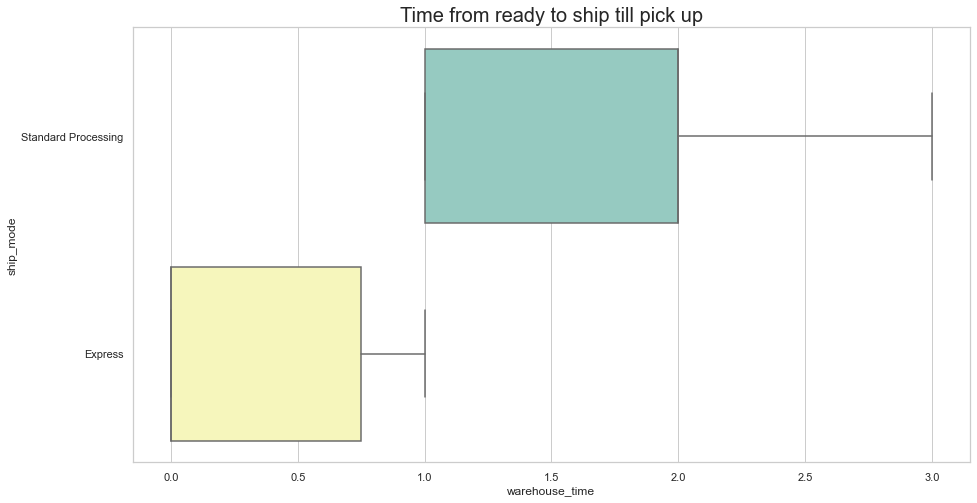

In [87]:
process_tracking['warehouse_time']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["ready_to_ship_date"]).dt.days
sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["warehouse_time"],palette="Set3" ).set_title('Time from ready to ship till pick up', fontsize = 20);
plt.show()

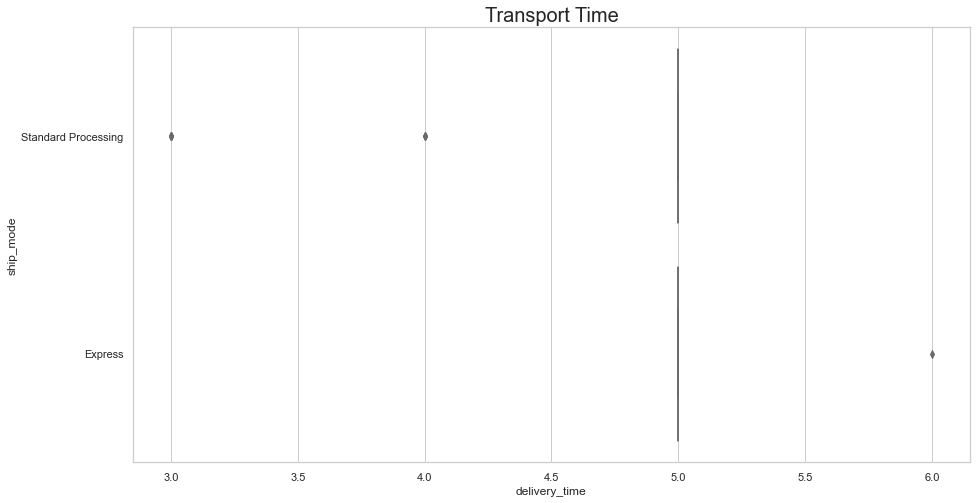

In [88]:
#process_tracking['delivery_time']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["on_truck_scan_date"]).dt.days
#process_tracking.info()

sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["delivery_time"],palette="Set3" ).set_title('Transport Time', fontsize = 20);
plt.show()

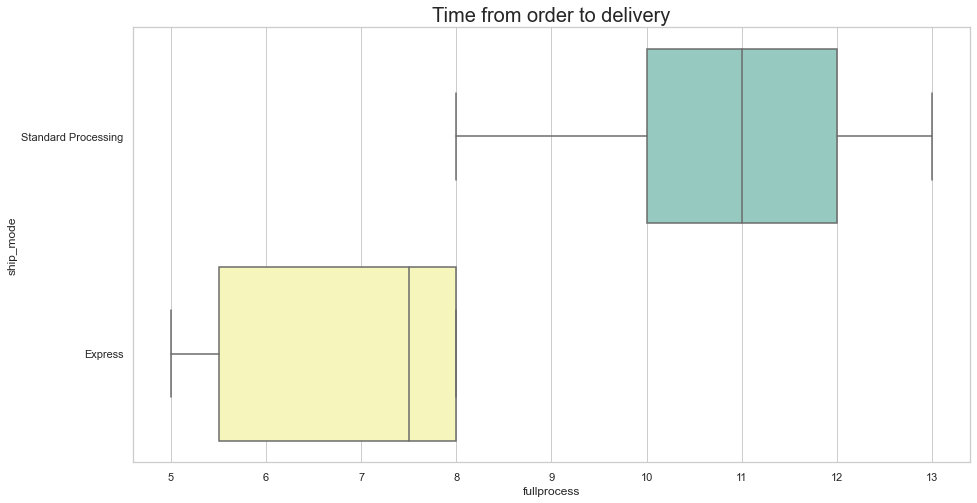

In [89]:
#process_tracking['fullprocess']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
#process_tracking.info()
sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["fullprocess"],palette="Set3" ).set_title('Time from order to delivery', fontsize = 20);
plt.show()

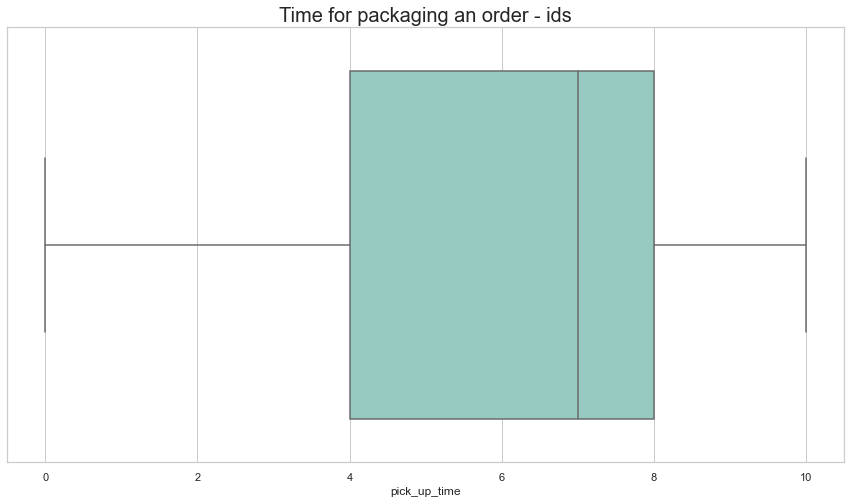

In [90]:
#process_tracking['pick_up_time']=(big_beautiful_data_tree["pickup_date"]-big_beautiful_data_tree["order_date"]).dt.days
#process_tracking.info()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=process_tracking["pick_up_time"],palette="Set3").set_title('Time for packaging an order - ids', fontsize = 20);
plt.show()



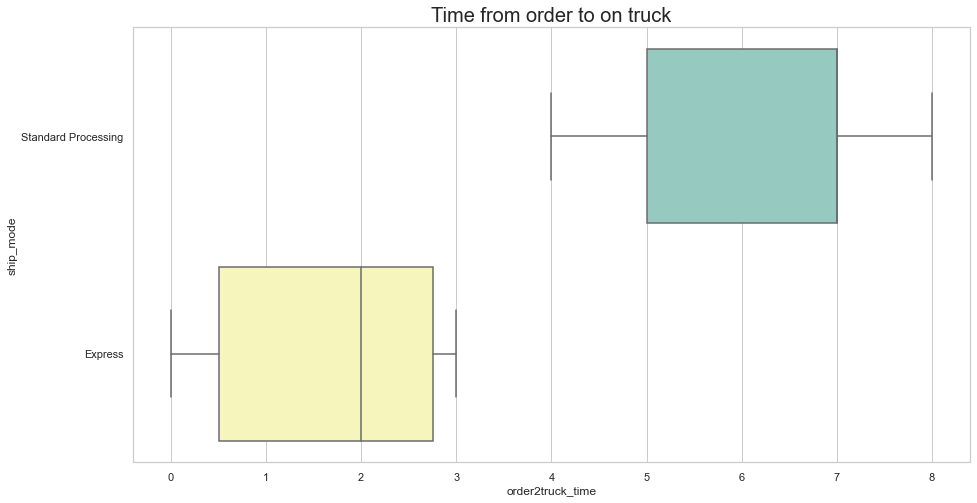

In [182]:
#process_tracking['order2truck_time']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
#process_tracking.info()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=process_time_cleaned["ship_mode"],x=process_tracking["order2truck_time"],palette="Set3").set_title('Time from order to on truck', fontsize = 20);
plt.show()

In [ ]:
big_beautiful_data_tree[['postal_code']] = big_beautiful_data_tree[['postal_code']].fillna(value=0)

In [187]:
#process_tracking['order2truck_time']['ship_mode_x'] == 'Express'].describe()
process_tracking.groupby(['ship_mode']).describe()

index                                                  \
                      count         mean          std   min     25%     50%   
ship_mode                                                                     
Express              2081.0  4941.630466  2917.674406  36.0  2290.0  4971.0   
Standard Processing  7913.0  5012.192847  2876.558460   1.0  2548.0  5007.0   

                                    process_time            ... delivery_time  \
                        75%     max        count      mean  ...           75%   
ship_mode                                                   ...                 
Express              7564.0  9982.0        102.0  1.911765  ...           5.0   
Standard Processing  7483.0  9994.0        316.0  4.882911  ...           5.0   

                         fullprocess                                        \
                     max       count       mean       std  min   25%   50%   
ship_mode                                                                    
Express              7.0       148.0   7.195946  2.326010  3.0   5.0   7.0   
Standard Processing  7.0       520.0  11.936538  2.031024  6.0  11.0  12.0   

                                 
                      75%   max  
ship_mode                        
Express               9.0  13.0  
Standard Processing  13.0  17.0  

[2 rows x 64 columns]

In [191]:
process_tracking.loc[process_tracking['ship_mode'] == 'Standard Processing'].describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,7913.000000,316.000000,316.000000,4596.000000,316.000000,4596.000000,520.000000,520.000000
mean,5012.192847,4.882911,6.930380,7.127502,2.047468,7.127502,4.553846,11.936538
std,2876.558460,1.385489,1.557846,1.651674,0.695308,1.651674,1.146741,2.031024
min,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,6.000000
25%,2548.000000,4.000000,6.000000,6.000000,2.000000,6.000000,4.000000,11.000000
50%,5007.000000,5.000000,7.000000,7.000000,2.000000,7.000000,5.000000,12.000000
75%,7483.000000,6.000000,8.000000,8.000000,3.000000,8.000000,5.000000,13.000000
max,9994.000000,8.000000,10.000000,12.000000,3.000000,12.000000,7.000000,17.000000


In [190]:
process_tracking.loc[process_tracking['ship_mode'] == 'Express'].describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,order2truck_time,delivery_time,fullprocess
count,2081.000000,102.000000,102.000000,1303.000000,102.000000,1303.000000,148.000000,148.000000
mean,4941.630466,1.911765,2.303922,2.568688,0.392157,2.568688,4.587838,7.195946
std,2917.674406,1.724046,1.693255,1.638534,0.510423,1.638534,1.409053,2.326010
min,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
25%,2290.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,5.000000
50%,4971.000000,2.000000,2.000000,3.000000,0.000000,3.000000,5.000000,7.000000
75%,7564.000000,3.000000,4.000000,4.000000,1.000000,4.000000,5.000000,9.000000
max,9982.000000,5.000000,6.000000,6.000000,2.000000,6.000000,7.000000,13.000000
